# Digitalize MNIST Handwritten Digits with Autoencoder

I would recommend to check [Francois Chollet's tutorial](https://blog.keras.io/building-autoencoders-in-keras.html) for Autoencoders.

In this post, I just created the digital digits and trained the convolutional network by defining it as the output.

In [1]:
# import modules
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# directory for the digital digit images
digital_digits_dir = 'data/mnist-digital-digits'
digital_digits = [x for x in os.listdir(digital_digits_dir) if 'png' in x]

## Import Digital Digit Images
Read image files and keep them in a dictionary

In [28]:
digits = {}

for i in digital_digits:
    digital_digits_file = digital_digits_dir+'/'+i
    digit = Image.open(digital_digits_file).convert('L')
    digit = np.array(digit)
    digits[int(i[-5])] = digit

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
x_digital = np.zeros(x_train.shape) # placeholder

for i in range(x_digital.shape[0]):
    x_digital[i] = digits[y_train[i]]

## Reshape Data

In [31]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_digital = x_digital/255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_digital = np.reshape(x_digital, (len(x_digital), 28, 28, 1))  # adapt this if using `channels_first` image data format

## Convolutional Autoencoder

In [32]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Train

In [34]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_digital,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0923 - val_loss: 1.2601
Epoch 2/5
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0903 - val_loss: 1.3434
Epoch 3/5
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0889 - val_loss: 1.4042
Epoch 4/5
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0876 - val_loss: 1.3562
Epoch 5/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0867 - val_loss: 1.3949


## Visualize Predictions

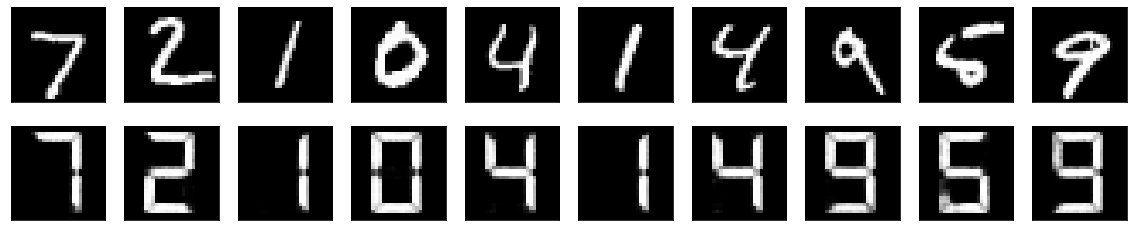

In [35]:
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt

n =10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Let' see how it is performing for some of the examples which are difficult to identify: 

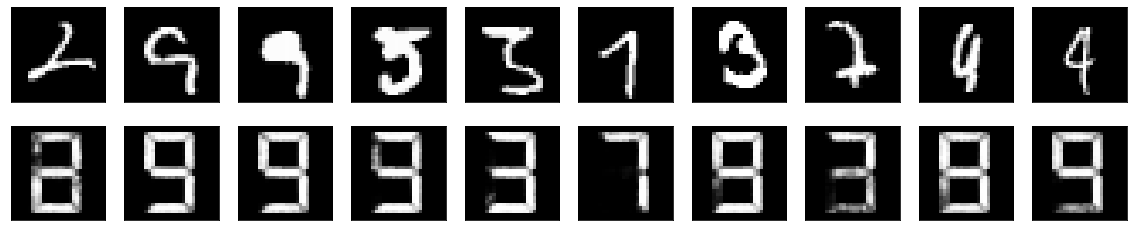

In [36]:
difficult_examples = x_test[[43,104, 209, 412,4018,4027, 6011, 1226,1232,1242]]
decoded_imgs = autoencoder.predict(difficult_examples)

import matplotlib.pyplot as plt

n =10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(difficult_examples[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()